# BMME890 - Fall 2019

## Wine Quality Project

Group: Nhan Pham, Khoi Huynh, Frank Wang, and Jiayi Xu

## Problem Overview

- Two datasets of red and white wine.
- Predict the quality of the red and white wine (score from 0 to 10)

## Dataset

- From UCI repository: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- Size: 4898 samples, 12 features
- Features: 
    - `fixed acidity`
    - `volatile acidity`
    - `citric acid`
    - `residual sugar`
    - `chlorides`
    - `free sulfur dioxide`
    - `total sulfur dioxide`
    - `density`
    - `pH`
    - `sulphates`
    - `alcohol`

## Approach

The problem can be viewed in 2 ways:
- Classification
- Regression

### Classification

- Multilabel classification problem
- Labels: $3 - 9$
- Methods: 
    - Random Forest (RF)
    - SVM
    - PCA + RF
    - Feature selection + RF

### Regression

- Perform usual regression techniques
- Round the output to its nearest integer
- Methods: 
    - Linear Regression
    - Ridge Regression
    - LASSO
    - Elastic Net
    - Gradient Boosting
    - Random Forest
    - "Average" Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# read red and white dataset and merge them
white_data=pd.read_csv('winequality-white.csv')
red_data=pd.read_csv('winequality-red.csv')

white_data_added=white_data
white_data_added['type']='white'

red_data_added=red_data
red_data_added['type']='red'

frames=[white_data_added, red_data_added]
dataset=pd.concat(frames, ignore_index=True)

dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


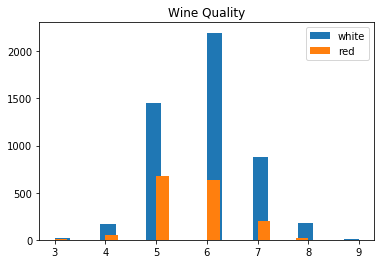

In [3]:
f,ax = plt.subplots(1,1)
ax.hist(dataset[dataset.type=='white'].quality, bins = 20)
ax.hist(dataset[dataset.type=='red'].quality, bins = 20)
ax.legend(['white','red'])
ax.set_title('Wine Quality')
plt.show()

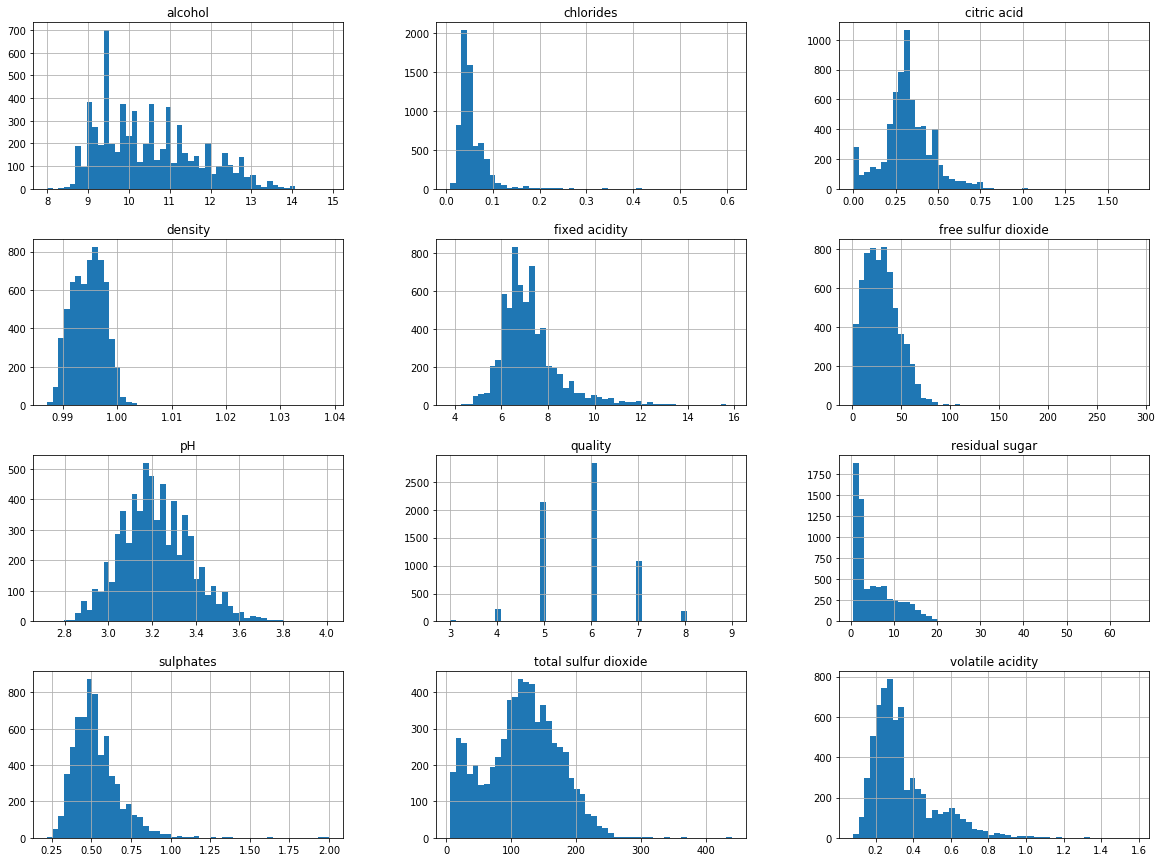

In [4]:
# histogram
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

## Note:

- The data look clean, no capped value, no missing values.
- Samples are in range $[3,9]$.

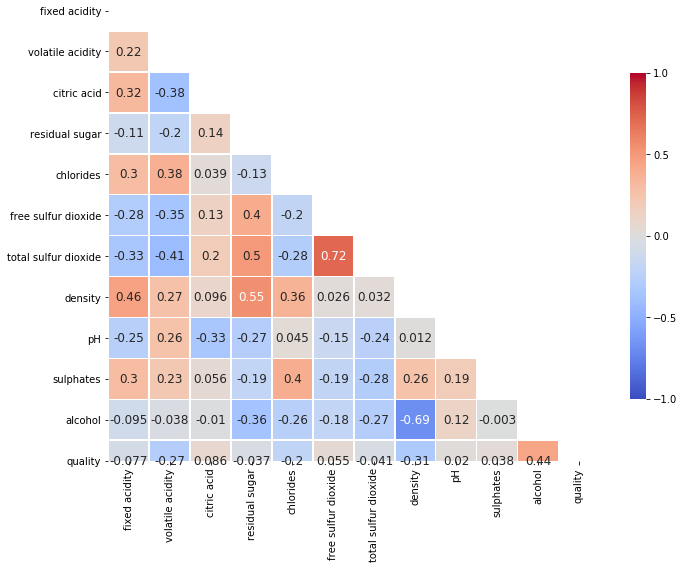

In [7]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .5, cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Imbalanced label classes

In [8]:
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Train-test split

In [9]:
# split into features and labels
dataset_y=dataset['quality']
dataset_x=dataset
dataset_x.drop(['quality'],axis=1,inplace=True)

In [10]:
dataset_x_withonehot = pd.get_dummies(dataset_x)
dataset_x_withonehot.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x_withonehot, dataset_y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle_cv(model, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf,error_score=np.nan))
    return rmse

def acc_cv(model, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    acc = cross_val_score(model, X_train, y_train, scoring="accuracy", cv = kf,error_score=np.nan)
    return acc

def AccWithTol(model,tol,X,y, low=3, high=9):
    y_pred=model.predict(X)
    accuracy = (np.abs(y_pred - y) < tol )
    np.mean(accuracy)
    dict={'Label':y_test,'Pred':y_pred,'T/F':accuracy}
    a=pd.DataFrame(dict)
    val_cnt = a.Label.value_counts().sort_index()
    val_cnt = val_cnt.to_numpy()
    correct_cnt = []
    acc = []
    for i in range(low,high):
        sub_class = a[a.Label==i]
        correct_cnt.append(np.sum(sub_class['T/F']))
        acc.append(correct_cnt[-1] / val_cnt[i-3])
    new_dict = {'label': np.arange(3,9),'total_cnt': val_cnt,'correct_cnt': correct_cnt, 'acc': acc}
    new_df = pd.DataFrame(new_dict)
    return new_df

def PrintResults(model,X_train,y_train,X_test,y_test):
    y_pred = model.predict(X_test)
    train_accuracies = accuracy_score(y_train,model.predict(X_train))
    print('Train set accuracy',train_accuracies)
    cm_train = confusion_matrix(y_train, model.predict(X_train))
    print('******Train set confusion matrix************')
    print(cm_train)
    # Making the Confusion Matrix
    test_accuracies = accuracy_score(y_test,y_pred)
    print('\n\nTest set accuracy',test_accuracies)
    cm_test = confusion_matrix(y_test, y_pred)
    print('******Test set confusion matrix************')
    print(cm_test)
    
    top2acc, _ = TopkAcc(model, X_test, y_test,k=2)
    print('\nTop 2 Accuracy:', top2acc)

def AccWithTol_Clf(model, tol, X, y, low = 3, high= 9, k=2, offset=3):
    y_pred=model.predict(X)
    
    _, match_array = TopkAcc(model, X, y, k, offset)
    
    dict={'Label':y_test,'Pred':y_pred,'T/F':match_array}
    
    a=pd.DataFrame(dict)
    val_cnt = a.Label.value_counts().sort_index()
    val_cnt = val_cnt.to_numpy()
    correct_cnt = []
    acc = []
    for i in range(low,high):
        sub_class = a[a.Label==i]
        correct_cnt.append(np.sum(sub_class['T/F']))
        acc.append(correct_cnt[-1] / val_cnt[i-3])
    new_dict = {'label': np.arange(3,9),'total_cnt': val_cnt,'correct_cnt': correct_cnt, 'acc': acc}
    new_df = pd.DataFrame(new_dict)
    return new_df

    

def TopkAcc(model, X, y, k=2, offset=3):
    y_predict_proba=model.predict_proba(X)

    max_k_preds = y_predict_proba.argsort(axis=1)[:, -k:][:, ::-1] + offset
    match_array = np.logical_or.reduce(max_k_preds==y.to_numpy().reshape([-1,1]), axis=1) 
    topk_acc_score = match_array.sum() / match_array.shape[0]
    
    return topk_acc_score, match_array


# 1. Classification

## Naive Approach

In [13]:
RFC = make_pipeline(
            StandardScaler(), 
            RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth=10,random_state = 0)
            )

score = acc_cv(RFC)
print("\nCross Validation accuracy: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
RFC.fit(X_train,y_train)
RFC_acc = AccWithTol_Clf(RFC,1,X_test,y_test)
RFC_acc


Cross Validation accuracy: mean 0.6088 std (0.0133)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,10,0.217391
2,5,420,398,0.947619
3,6,579,574,0.991364
4,7,221,179,0.809955
5,8,32,8,0.250000


In [14]:
PrintResults(RFC,X_train,y_train,X_test,y_test)

Train set accuracy 0.8120069270733116
******Train set confusion matrix************
[[  21    0    2    5    0    0    0]
 [   0   69   68   33    0    0    0]
 [   0    0 1480  230    8    0    0]
 [   0    0  252 1957   48    0    0]
 [   0    0   12  247  598    1    0]
 [   0    0    1   36   31   93    0]
 [   0    0    0    1    2    0    2]]


Test set accuracy 0.6284615384615385
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  0   4  27  13   2   0]
 [  0   0 299 119   2   0]
 [  0   0 118 425  35   1]
 [  0   2  12 122  84   1]
 [  0   0   1  17   9   5]]

Top 2 Accuracy: 0.8992307692307693


In [39]:
param_grid = [
    {'randomforestclassifier__n_estimators': [5, 10, 15,20], 
     'randomforestclassifier__max_features': [1,3,5,10], 
     'randomforestclassifier__max_depth':[5,10,15],
     'randomforestclassifier__min_samples_split':[2,5,10],
     'randomforestclassifier__min_samples_leaf':[1,5,10]},
    {'randomforestclassifier__bootstrap': [False], 
     'randomforestclassifier__n_estimators': [5, 10, 20], 
     'randomforestclassifier__max_features': [1,3,5,10],
     'randomforestclassifier__max_depth':[5,10,15],
     'randomforestclassifier__min_samples_split':[2,5,10],
     'randomforestclassifier__min_samples_leaf':[1,5,10]}
  ]

grid_search = GridSearchCV(estimator = RFC,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

/Users/mkhoi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [135]:
RFC_grid_acc = AccWithTol_Clf(grid_search.best_estimator_,1,X_test,y_test)
RFC_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,17,0.369565
2,5,420,400,0.952381
3,6,579,563,0.972366
4,7,221,178,0.805430
5,8,32,10,0.312500


In [136]:
PrintResults(grid_search.best_estimator_,X_train,y_train,X_test,y_test)

Train set accuracy 0.9992303251876082
******Train set confusion matrix************
[[  28    0    0    0    0    0    0]
 [   0  170    0    0    0    0    0]
 [   0    0 1717    1    0    0    0]
 [   0    0    3 2254    0    0    0]
 [   0    0    0    0  858    0    0]
 [   0    0    0    0    0  161    0]
 [   0    0    0    0    0    0    5]]


Test set accuracy 0.686923076923077
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  1   7  25  11   2   0]
 [  0   2 330  85   3   0]
 [  0   1  95 435  48   0]
 [  0   0   9  97 113   2]
 [  0   0   0  15   9   8]]

Top 2 Accuracy: 0.8984615384615384


## Feature Importance

In [56]:
feature_importances = grid_search.best_estimator_[1].feature_importances_
attributes = list(X_train)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.13757648108810225, 'alcohol'),
 (0.10509857015551102, 'volatile acidity'),
 (0.098495644975274, 'density'),
 (0.08962774724575794, 'total sulfur dioxide'),
 (0.08762649120656886, 'free sulfur dioxide'),
 (0.08392579809022746, 'sulphates'),
 (0.08354152468167267, 'residual sugar'),
 (0.080644160464627, 'chlorides'),
 (0.07955458035545662, 'citric acid'),
 (0.07635490443353606, 'pH'),
 (0.07050965476605824, 'fixed acidity'),
 (0.0038642346510926705, 'type_red'),
 (0.003180207886115264, 'type_white')]

In [57]:
feature_names = ['volatile acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','density','alcohol']

X_train_drop=pd.DataFrame(X_train[feature_names])
X_test_drop=pd.DataFrame(X_test[feature_names])



In [59]:
param_grid = [
    {'randomforestclassifier__bootstrap': [False], 
     'randomforestclassifier__n_estimators': [5, 10, 20], 
     'randomforestclassifier__max_features':  [1,3,6],
     'randomforestclassifier__max_depth':[5,10,15],
     'randomforestclassifier__min_samples_split':[2,5,10],
     'randomforestclassifier__min_samples_leaf':[1,5,10]}
  ]

grid_search_drop = GridSearchCV(estimator = RFC,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search_drop = grid_search_drop.fit(X_train_drop, y_train)
print(grid_search_drop.best_params_)


{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 1, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 20}


In [137]:
FI_RFC_grid_acc = AccWithTol_Clf(grid_search_drop.best_estimator_,1,X_test_drop,y_test)
FI_RFC_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,15,0.326087
2,5,420,402,0.957143
3,6,579,567,0.979275
4,7,221,190,0.859729
5,8,32,12,0.375000


In [138]:
PrintResults(grid_search_drop.best_estimator_, X_train_drop, y_train, X_test_drop, y_test)

Train set accuracy 0.996921300750433
******Train set confusion matrix************
[[  28    0    0    0    0    0    0]
 [   0  169    1    0    0    0    0]
 [   0    0 1713    5    0    0    0]
 [   0    0    5 2252    0    0    0]
 [   0    0    0    1  857    0    0]
 [   0    0    0    1    3  157    0]
 [   0    0    0    0    0    0    5]]


Test set accuracy 0.6807692307692308
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  0  11  23  11   1   0]
 [  1   5 310 101   3   0]
 [  0   0  94 445  40   0]
 [  0   0   4 104 112   1]
 [  0   0   0  15  10   7]]

Top 2 Accuracy: 0.9123076923076923


## PCA

In [92]:
PCA_RFC = make_pipeline(
            StandardScaler(), 
            PCA(n_components=.95),
            RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        )

In [93]:
param_grid = [
    {'randomforestclassifier__bootstrap': [False], 
     'randomforestclassifier__n_estimators': [5, 10, 20], 
     'randomforestclassifier__max_features': [2, 4,9],
     'randomforestclassifier__min_samples_split':[2,5,10],
     'randomforestclassifier__max_depth':[5,10,15],
     'randomforestclassifier__min_samples_leaf':[1,5,10]}
  ]

grid_search_PC = GridSearchCV(PCA_RFC, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,error_score=np.nan,n_jobs = -1)
grid_search_PC.fit(X_train, y_train)
print(grid_search_PC.best_params_)

{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 20}


In [139]:
PCA_RFC_grid_acc = AccWithTol_Clf(grid_search_PC.best_estimator_,1,X_test,y_test)
PCA_RFC_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,14,0.304348
2,5,420,406,0.966667
3,6,579,573,0.989637
4,7,221,180,0.814480
5,8,32,12,0.375000


In [140]:
PrintResults(grid_search_PC.best_estimator_,X_train,y_train,X_test,y_test)

Train set accuracy 0.9992303251876082
******Train set confusion matrix************
[[  27    0    0    1    0    0    0]
 [   0  170    0    0    0    0    0]
 [   0    0 1718    0    0    0    0]
 [   0    0    1 2256    0    0    0]
 [   0    0    0    2  856    0    0]
 [   0    0    0    0    0  161    0]
 [   0    0    0    0    0    0    5]]


Test set accuracy 0.693076923076923
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  0   9  22  14   1   0]
 [  1   0 313 102   4   0]
 [  0   1  79 455  43   1]
 [  0   0   6  97 117   1]
 [  0   0   1  14  10   7]]

Top 2 Accuracy: 0.9115384615384615


## Feature Selection + Random Forest

### $\ell_1$ penalty

In [96]:
FS_RF_l1 = make_pipeline(
            StandardScaler(),
            SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=5000)),
            RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
        )

In [98]:
param_grid = [
    {'selectfrommodel__estimator__C': [1e-3,1e-2,1e-1,1],
     'randomforestclassifier__bootstrap': [False], 
     'randomforestclassifier__n_estimators': [5, 10, 20], 
     'randomforestclassifier__max_features': [2, 4,9],
     'randomforestclassifier__min_samples_split':[2,5,10],
     'randomforestclassifier__max_depth':[5,10,15],
     'randomforestclassifier__min_samples_leaf':[1,5,10]}
  ]

grid_search_fsrf_l1 = GridSearchCV(FS_RF_l1, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,error_score=np.nan,n_jobs = -1)
grid_search_fsrf_l1.fit(X_train, y_train)
print(grid_search_fsrf_l1.best_params_)

/Users/mkhoi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 4, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 20, 'selectfrommodel__estimator__C': 0.1}


In [141]:
FS_RFC_L1_grid_acc = AccWithTol_Clf(grid_search_fsrf_l1.best_estimator_,1,X_test,y_test)
FS_RFC_L1_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,17,0.369565
2,5,420,407,0.969048
3,6,579,570,0.984456
4,7,221,185,0.837104
5,8,32,10,0.312500


In [142]:
PrintResults(grid_search_fsrf_l1.best_estimator_,X_train,y_train,X_test,y_test)

Train set accuracy 0.9953819511256494
******Train set confusion matrix************
[[  28    0    0    0    0    0    0]
 [   0  169    0    1    0    0    0]
 [   0    0 1715    3    0    0    0]
 [   0    0   15 2242    0    0    0]
 [   0    0    1    2  855    0    0]
 [   0    0    0    1    1  159    0]
 [   0    0    0    0    0    0    5]]


Test set accuracy 0.6861538461538461
******Test set confusion matrix************
[[  0   0   1   1   0   0]
 [  0   9  27   9   1   0]
 [  0   2 325  91   2   0]
 [  0   0 102 441  35   1]
 [  0   1   7 100 110   3]
 [  0   0   1  13  11   7]]

Top 2 Accuracy: 0.9146153846153846


### $\ell_2$ penalty

In [101]:
FS_RF_l2 = make_pipeline(
            StandardScaler(),
            SelectFromModel(LinearSVC(C=0.01, penalty="l2", dual=False,max_iter=5000)),
            RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
        )

In [103]:
param_grid = [
    {'selectfrommodel__estimator__C': [1e-3,1e-2,1e-1,1],
     'randomforestclassifier__bootstrap': [False], 
     'randomforestclassifier__n_estimators': [5, 10, 20], 
     'randomforestclassifier__max_features': [2, 4,9],
     'randomforestclassifier__min_samples_split':[2,5,10],
     'randomforestclassifier__max_depth':[5,10,15],
     'randomforestclassifier__min_samples_leaf':[1,5,10]}
  ]

grid_search_fsrf_l2 = GridSearchCV(FS_RF_l2, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,error_score=np.nan,n_jobs = -1)
grid_search_fsrf_l2.fit(X_train, y_train)
print(grid_search_fsrf_l2.best_params_)

/Users/mkhoi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 20, 'selectfrommodel__estimator__C': 0.01}


In [143]:
FS_RFC_L2_grid_acc = AccWithTol_Clf(grid_search_fsrf_l2.best_estimator_,1,X_test,y_test)
FS_RFC_L2_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,12,0.260870
2,5,420,389,0.926190
3,6,579,554,0.956822
4,7,221,175,0.791855
5,8,32,12,0.375000


In [144]:
PrintResults(grid_search_fsrf_l2.best_estimator_,X_train,y_train,X_test,y_test)

Train set accuracy 0.9948046950163556
******Train set confusion matrix************
[[  28    0    0    0    0    0    0]
 [   0  170    0    0    0    0    0]
 [   0    0 1708   10    0    0    0]
 [   0    0   11 2246    0    0    0]
 [   0    0    0    2  856    0    0]
 [   0    0    0    4    0  157    0]
 [   0    0    0    0    0    0    5]]


Test set accuracy 0.6569230769230769
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  0   9  23  11   3   0]
 [  0   6 305 106   3   0]
 [  0   0 100 416  60   3]
 [  0   0  13  91 116   1]
 [  0   0   0  14  10   8]]

Top 2 Accuracy: 0.8784615384615385


## Summary

In [145]:
new_dict = {
        'Label': ['Class_'+str(x) for x in range(3,9)],
        'RF': RFC_grid_acc.acc,
        'FI + RF': FI_RFC_grid_acc.acc, 
        'PCA + RF': PCA_RFC_grid_acc.acc,
        'FS L1 + RF': FS_RFC_L1_grid_acc.acc,
        'FS L2 + RF': FS_RFC_L2_grid_acc.acc,
}

reg_df = pd.DataFrame(new_dict)
reg_df.set_index('Label', inplace=True)
reg_df

,RF,FI + RF,PCA + RF,FS L1 + RF,FS L2 + RF
Label,,,,,
Class_3,0.000000,0.000000,0.000000,0.000000,0.000000
Class_4,0.369565,0.326087,0.304348,0.369565,0.260870
Class_5,0.952381,0.957143,0.966667,0.969048,0.926190
Class_6,0.972366,0.979275,0.989637,0.984456,0.956822
Class_7,0.805430,0.859729,0.814480,0.837104,0.791855
Class_8,0.312500,0.375000,0.375000,0.312500,0.375000


In [146]:
reg_list = [RFC_grid_acc, FI_RFC_grid_acc, PCA_RFC_grid_acc, FS_RFC_L1_grid_acc, FS_RFC_L2_grid_acc]
total_acc = []
total_acc.extend([np.sum(x.correct_cnt) / np.sum(x.total_cnt) for x in  reg_list])

new_dict = {'Total Acc': total_acc}
reg_names = ['RF', 'FI + RF', 'PCA + RF', 'FS L1 + RF', 'FS L2 + RF']
total_acc = pd.DataFrame(new_dict, index=reg_names)
total_acc

,Total Acc
RF,0.898462
FI + RF,0.912308
PCA + RF,0.911538
FS L1 + RF,0.914615
FS L2 + RF,0.878462
